In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
normal_eye = r'C:\Users\ishug\OneDrive\Desktop\Deep learning project\eye problem\Normal'
papilledema = r'C:\Users\ishug\OneDrive\Desktop\Deep learning project\eye problem\Papilledema'
Pseudopapilledema = r'C:\Users\ishug\OneDrive\Desktop\Deep learning project\eye problem\Pseudopapilledema'
normal_eye_folder = os.listdir(normal_eye)
papilledema_eye_folder = os.listdir(papilledema)
Pseudopapilledema_eye_folder = os.listdir(Pseudopapilledema)

Shape of the image is:  (240, 240, 3)


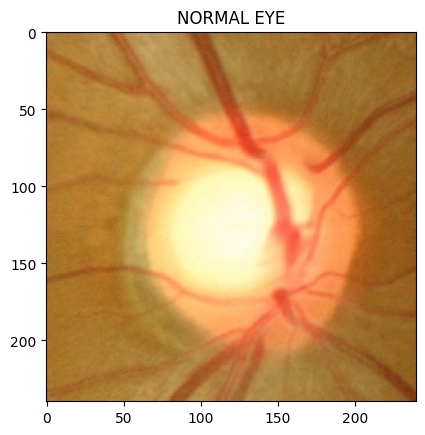

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in normal_eye_folder:
  img = mpimg.imread(os.path.join(normal_eye, i))
  print("Shape of the image is: ",img.shape)
  plt.imshow(img)
  plt.title("NORMAL EYE")
  plt.show()
  break    #only printing one photo

Shape of the image is:  (240, 240, 3)


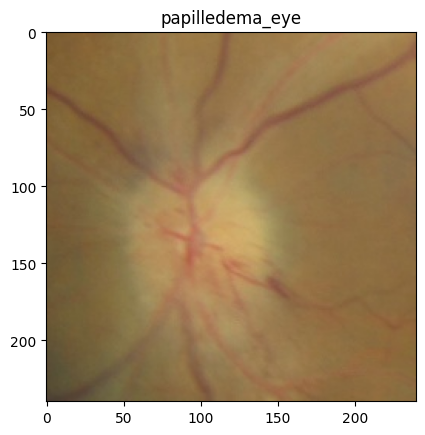

In [4]:
for i in papilledema_eye_folder:
  img = mpimg.imread(os.path.join(papilledema, i))
  print("Shape of the image is: ",img.shape)
  plt.imshow(img)
  plt.title("papilledema_eye")
  plt.show()
  break

Shape of the image is:  (240, 240, 3)


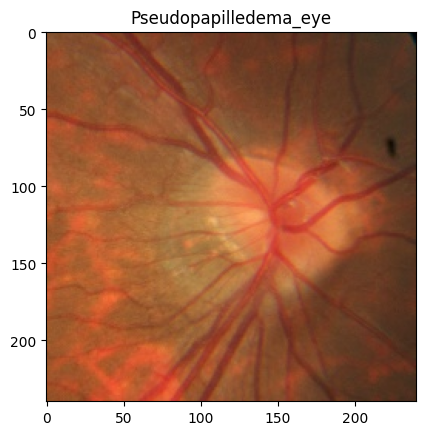

In [5]:
for i in Pseudopapilledema_eye_folder:
  img = mpimg.imread(os.path.join(Pseudopapilledema, i))
  print("Shape of the image is: ",img.shape)
  plt.imshow(img)
  plt.title("Pseudopapilledema_eye")
  plt.show()
  break

In [6]:
from PIL import Image
#converting the image into dataset and corresponding labels

dataset = []  # store  the images
label = []   # store the label

# 0 for normal eye , 1 for papilledema , 2 for pseudopapilledema
for i in normal_eye_folder:
  img = Image.open(os.path.join(normal_eye, i))
  img = img.resize((64,64))
  img_array = np.array(img)
  dataset.append(img_array)
  label.append(0)


In [7]:
print("Length of Datasets: ",len(dataset))
print("Length of label: ",len(label))

Length of Datasets:  779
Length of label:  779


In [8]:
dataset[0]

array([[[173, 129,  55],
        [175, 128,  55],
        [174, 126,  53],
        ...,
        [150, 101,  35],
        [149,  98,  34],
        [152, 102,  38]],

       [[173, 127,  56],
        [175, 127,  56],
        [174, 126,  55],
        ...,
        [154, 105,  39],
        [148, 104,  35],
        [149, 101,  34]],

       [[173, 121,  50],
        [174, 124,  51],
        [176, 128,  55],
        ...,
        [153, 111,  47],
        [151, 104,  40],
        [142, 100,  32]],

       ...,

       [[165, 115,  42],
        [163, 111,  41],
        [165, 110,  43],
        ...,
        [128,  61,  20],
        [128,  63,  21],
        [138,  83,  30]],

       [[158, 104,  40],
        [159, 103,  39],
        [160, 102,  39],
        ...,
        [136,  78,  29],
        [126,  59,  18],
        [128,  59,  18]],

       [[165, 114,  43],
        [164, 112,  41],
        [162, 111,  44],
        ...,
        [145,  99,  37],
        [133,  78,  26],
        [127,  59,  19]]

In [9]:
label[0]

0

In [10]:
#doing same for both the eye problem

for i in papilledema_eye_folder:
  img = Image.open(os.path.join(papilledema, i))
  img = img.resize((64,64))
  img_array = np.array(img)
  dataset.append(img_array)
  label.append(1)      # 1 for the papilledema eye

for i in Pseudopapilledema_eye_folder:
  img = Image.open(os.path.join(Pseudopapilledema, i))
  img = img.resize((64,64))
  img_array = np.array(img)
  dataset.append(img_array)
  label.append(2)     # 2 for the pseudopapilledema eye

In [11]:
print("Length of Datasets: ",len(dataset))
print("Length of label: ",len(label))

Length of Datasets:  1369
Length of label:  1369


In [12]:
dataset = np.array(dataset)

In [13]:
label = np.array(label)

In [14]:
from sklearn.model_selection import train_test_split
#splitting into train and test in 80 - 20 ratio
x_train,x_test,y_train,y_test = train_test_split(dataset,label, test_size = 0.2,random_state = 42)

In [15]:
x_train

array([[[[105,  73,  52],
         [108,  76,  55],
         [112,  78,  55],
         ...,
         [185, 130,  82],
         [182, 120,  72],
         [171, 106,  63]],

        [[104,  71,  51],
         [108,  75,  54],
         [112,  77,  54],
         ...,
         [182, 125,  75],
         [180, 116,  67],
         [168, 101,  58]],

        [[106,  72,  53],
         [112,  76,  55],
         [114,  76,  53],
         ...,
         [177, 120,  71],
         [173, 110,  64],
         [166, 101,  61]],

        ...,

        [[108,  64,  43],
         [106,  64,  44],
         [103,  62,  42],
         ...,
         [174, 100,  55],
         [180, 111,  64],
         [188, 122,  70]],

        [[105,  64,  44],
         [103,  63,  43],
         [102,  63,  42],
         ...,
         [173, 101,  54],
         [171, 102,  55],
         [176, 107,  57]],

        [[103,  63,  43],
         [100,  63,  43],
         [102,  66,  44],
         ...,
         [173, 103,  55],
        

In [16]:
x_train.shape

(1095, 64, 64, 3)

In [17]:
y_train.shape

(1095,)

In [18]:
x_test.shape

(274, 64, 64, 3)

In [19]:
y_test.shape

(274,)

In [20]:
from keras.utils import to_categorical
#normalize the data
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, num_classes=3, dtype='uint8')
y_test = to_categorical(y_test, num_classes=3, dtype='uint8')

In [21]:
y_train

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [22]:
x_train

array([[[[0.41176471, 0.28627451, 0.20392157],
         [0.42352941, 0.29803922, 0.21568627],
         [0.43921569, 0.30588235, 0.21568627],
         ...,
         [0.7254902 , 0.50980392, 0.32156863],
         [0.71372549, 0.47058824, 0.28235294],
         [0.67058824, 0.41568627, 0.24705882]],

        [[0.40784314, 0.27843137, 0.2       ],
         [0.42352941, 0.29411765, 0.21176471],
         [0.43921569, 0.30196078, 0.21176471],
         ...,
         [0.71372549, 0.49019608, 0.29411765],
         [0.70588235, 0.45490196, 0.2627451 ],
         [0.65882353, 0.39607843, 0.22745098]],

        [[0.41568627, 0.28235294, 0.20784314],
         [0.43921569, 0.29803922, 0.21568627],
         [0.44705882, 0.29803922, 0.20784314],
         ...,
         [0.69411765, 0.47058824, 0.27843137],
         [0.67843137, 0.43137255, 0.25098039],
         [0.65098039, 0.39607843, 0.23921569]],

        ...,

        [[0.42352941, 0.25098039, 0.16862745],
         [0.41568627, 0.25098039, 0.17254902]

In [23]:
x_test

array([[[[0.31372549, 0.12941176, 0.00392157],
         [0.29019608, 0.10980392, 0.00392157],
         [0.25882353, 0.07058824, 0.00392157],
         ...,
         [0.49019608, 0.24313725, 0.05098039],
         [0.47843137, 0.23529412, 0.05098039],
         [0.47058824, 0.22745098, 0.03529412]],

        [[0.32156863, 0.14117647, 0.00784314],
         [0.31372549, 0.13333333, 0.00784314],
         [0.28235294, 0.09803922, 0.00392157],
         ...,
         [0.48235294, 0.23137255, 0.04313725],
         [0.47843137, 0.23529412, 0.05098039],
         [0.46666667, 0.22745098, 0.04313725]],

        [[0.33333333, 0.14509804, 0.00784314],
         [0.32941176, 0.14901961, 0.00392157],
         [0.31764706, 0.1372549 , 0.00784314],
         ...,
         [0.48627451, 0.23137255, 0.03921569],
         [0.47843137, 0.23529412, 0.05098039],
         [0.4627451 , 0.22745098, 0.04313725]],

        ...,

        [[0.36470588, 0.1372549 , 0.01176471],
         [0.34117647, 0.11764706, 0.00784314]

In [24]:
from tensorflow.keras import layers, models

In [25]:
#builing the convulational model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape=(64,64,3)))   # 32 is the number of filter, (3,3) filter size , activation function is relu because relu generally did not have vanishing gradient
model.add(layers.MaxPooling2D(2,2));                                          # (64,64,3) is the image is size with 3

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2));

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2));

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2));



In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [27]:
model.add(layers.Flatten()) # flatten the layer so model able to take the input
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3)) # to reduce the overfitting
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3,activation = 'softmax')) # it is multi class classfication so we use softmax activation function


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [29]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


In [30]:
x_train.shape

(1095, 64, 64, 3)

In [31]:
y_train.shape

(1095, 3)

In [32]:
x_test.shape

(274, 64, 64, 3)

In [33]:
y_test.shape

(274, 3)

In [34]:
model.output_shape

(None, 3)

In [35]:
history = model.fit(x_train,y_train, batch_size = 32 ,verbose=2,epochs = 15,validation_data = (x_test,y_test))

Epoch 1/15


35/35 - 9s - loss: 0.9331 - accuracy: 0.5434 - val_loss: 0.7636 - val_accuracy: 0.5803 - 9s/epoch - 255ms/step
Epoch 2/15
35/35 - 2s - loss: 0.7878 - accuracy: 0.5689 - val_loss: 0.7025 - val_accuracy: 0.6752 - 2s/epoch - 70ms/step
Epoch 3/15
35/35 - 2s - loss: 0.7278 - accuracy: 0.6868 - val_loss: 0.7048 - val_accuracy: 0.7080 - 2s/epoch - 61ms/step
Epoch 4/15
35/35 - 2s - loss: 0.6791 - accuracy: 0.7068 - val_loss: 0.6867 - val_accuracy: 0.7190 - 2s/epoch - 71ms/step
Epoch 5/15
35/35 - 2s - loss: 0.6708 - accuracy: 0.7187 - val_loss: 0.5955 - val_accuracy: 0.7664 - 2s/epoch - 66ms/step
Epoch 6/15
35/35 - 3s - loss: 0.6613 - accuracy: 0.7269 - val_loss: 0.5669 - val_accuracy: 0.7810 - 3s/epoch - 81ms/step
Epoch 7/15
35/35 - 2s - loss: 0.5912 - accuracy: 0.7416 - val_loss: 0.4984 - val_accuracy: 0.7956 - 2s/epoch - 63ms/step
Epoch 8/15
35/35 - 2s - loss: 0.5419 - accuracy: 0.7708 - val_loss: 0.4909 - val_accuracy: 0.8102 - 2s/epoch - 65ms/step
Epoch 9/15
35/35 - 2s - loss:

In [36]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Training Accuracy:", train_accuracy[-1] * 100)
print("Validation Accuracy:", val_accuracy[-1] * 100)

Training Accuracy: 88.03653120994568
Validation Accuracy: 89.05109763145447


9/9 - 0s - loss: 0.3180 - accuracy: 0.8905 - 178ms/epoch - 20ms/step


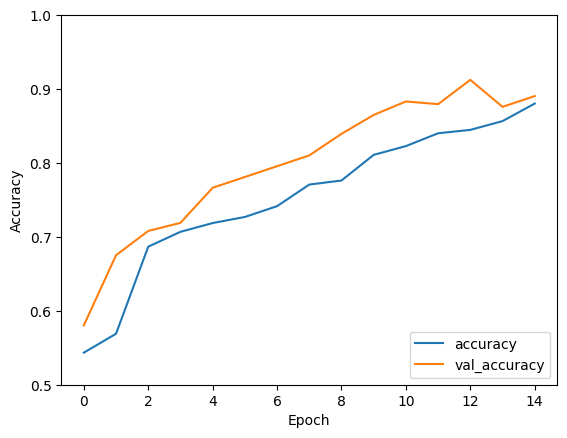

In [37]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)


In [38]:
model.save("PapilledemaandPseudopapilledemaprediction.h5")

c:\Users\ishug\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
def convert_into_pixel(img):
  img = img.resize((64,64))
  img_pixel = np.array(img)

  img_pixel = img_pixel / 255

  return img_pixel

#user input
img  = Image.open("288.jpg")

converted_img = convert_into_pixel(img)

prediction =  model.predict(np.expand_dims(converted_img,axis = 0))
print(prediction)
predicted_class = np.argmax(prediction)

if(predicted_class == 0):
  print("Normal Eye")
elif predicted_class == 1:
  print("Papilledema Eye")
elif predicted_class == 2:
  print("Pseudopapilledema Eye")



1/1 [==============================] - 0s 318ms/step
[[0.11765174 0.15020186 0.73214644]]
Pseudopapilledema Eye
